In [1]:
!hostname
!pwd

freeman-titanxp-1.csail.mit.edu
/data/vision/phillipi/akumar01/synthetic-mdps/src


In [2]:
# This is autoreload module code using jupyter magic
%load_ext autoreload
%autoreload 2

In [3]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import os
from tqdm.auto import tqdm
import glob
import matplotlib

from einops import rearrange, repeat

In [6]:

def plot_curve_lines(x, y, c="r", **kwargs):  # x.shape=(t, ), y.shape = (n, t)
    c = matplotlib.colors.to_rgba(c)
    plt.plot(x, y.mean(axis=0), c=c, **kwargs)
    c = [c[0], c[1], c[2], .1]
    plt.plot(x, y.T, c=c)

def plot_curve_err(x, y, c="r", **kwargs):  # x.shape=(t, ), y.shape = (n, t)
    c = matplotlib.colors.to_rgba(c)
    mean, std = y.mean(axis=0), y.std(axis=0)
    err = std/np.sqrt(y.shape[0])
    plt.plot(x, mean, c=c, **kwargs)
    c = [c[0], c[1], c[2], .1]
    plt.fill_between(x, mean-err, mean+err, color=c)


In [51]:

def viz_training(load_dir):
    print(load_dir)
    with open(f"{load_dir}/config.json", "r") as f:
        config = json.load(f)
    with open(f"{load_dir}/rew.pkl", "rb") as f:
        rew = np.asarray(pickle.load(f)) # (s, n, t, e)
    rew = rew.mean(axis=(-1, -2))

    plt.figure(figsize=(10, 5))
    plot_curve_err(np.arange(rew.shape[-1]), rew, c="r")
    # smoothed = np.convolve(rew.mean(axis=0), np.ones(50)/50, mode='same')
    # plt.plot(smoothed, c='blue')

    plt.title(f"Pretraining Env:\n{config['env_id']}")
    plt.ylabel('Average Reward per Timestep')
    plt.xlabel('Training Steps')
    plt.legend()
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'{args.save_dir}/plot_pretrain.png')
    # plt.close()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


../data/train/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=1x128


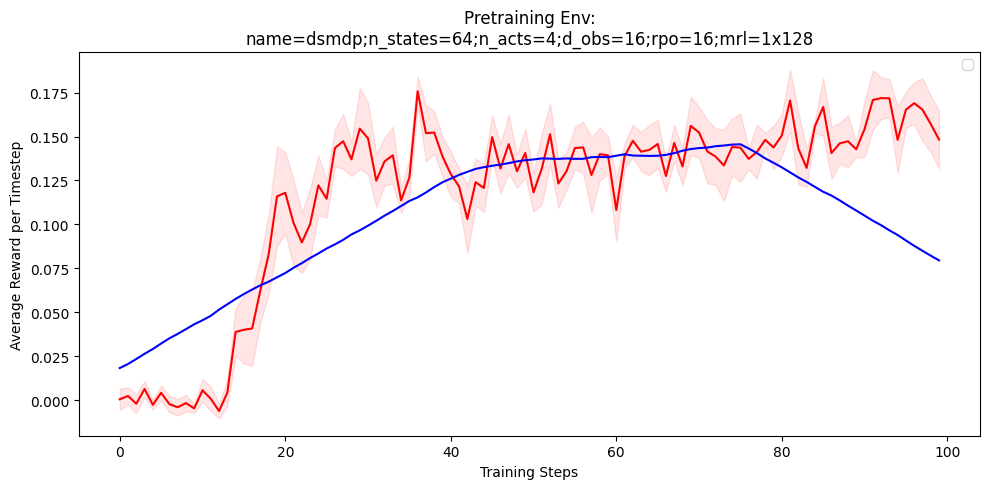

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


../data/train/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=8x16


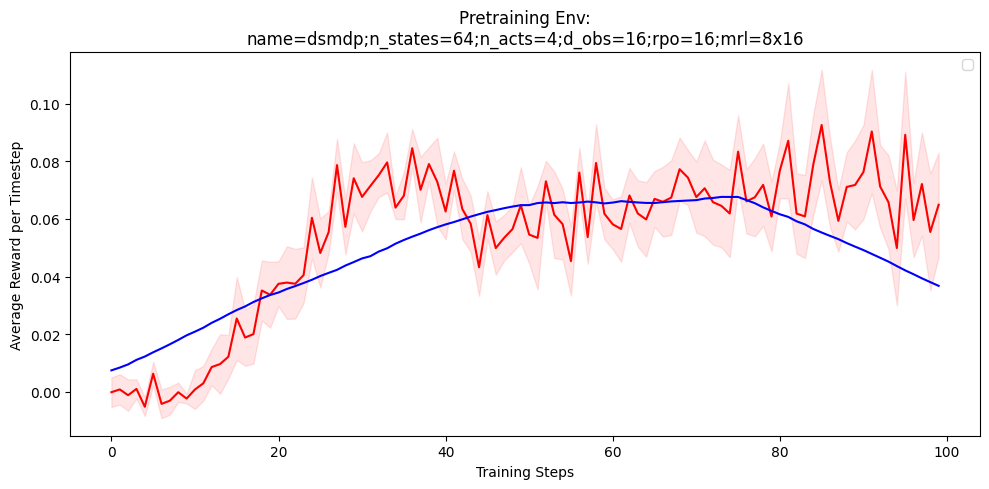

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


../data/train/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=16x8


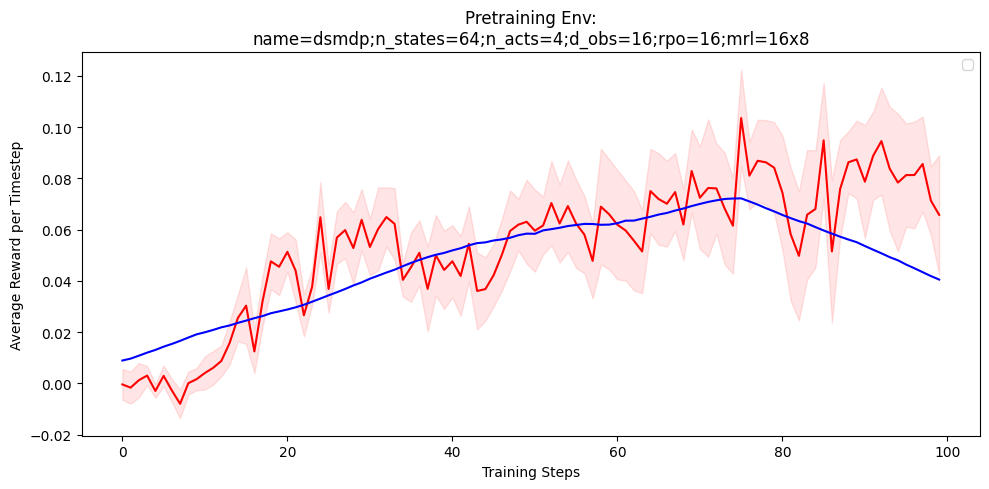

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


../data/train/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=128x1


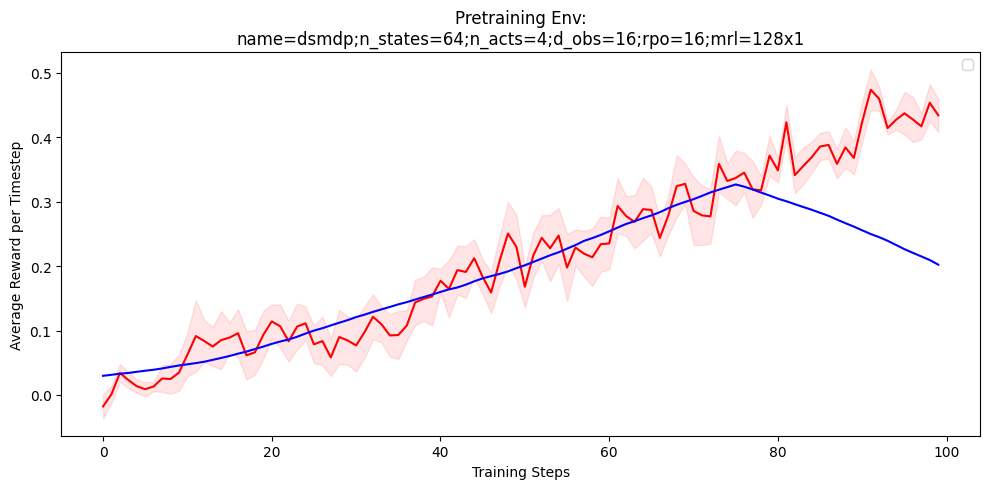

In [27]:

    
viz_training("../data/train/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=1x128")
viz_training("../data/train/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=8x16")
viz_training("../data/train/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=16x8")
viz_training("../data/train/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=128x1")



../data/eval/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=1x128


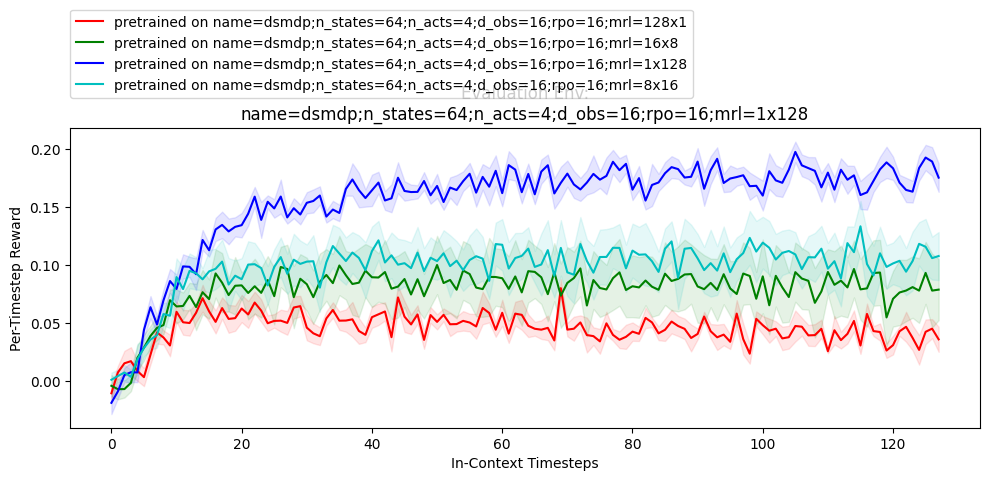

../data/eval/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=8x16


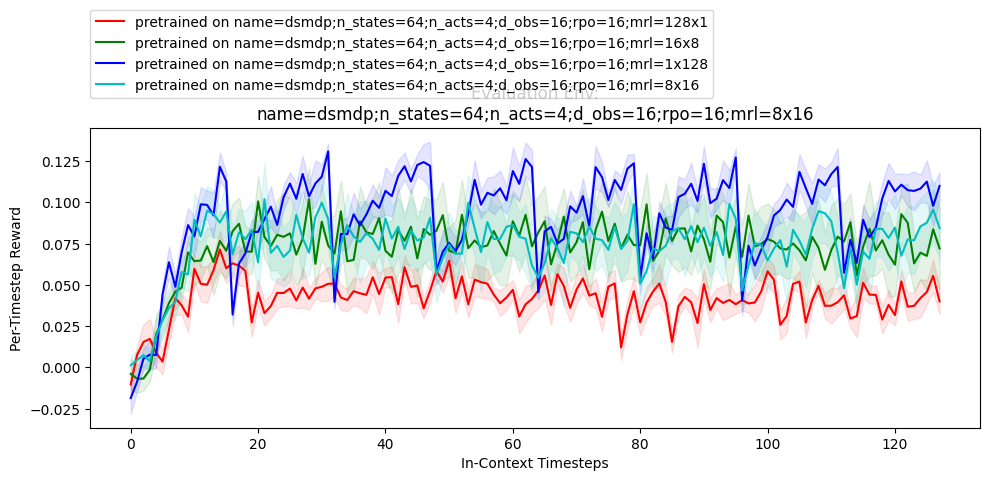

../data/eval/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=16x8


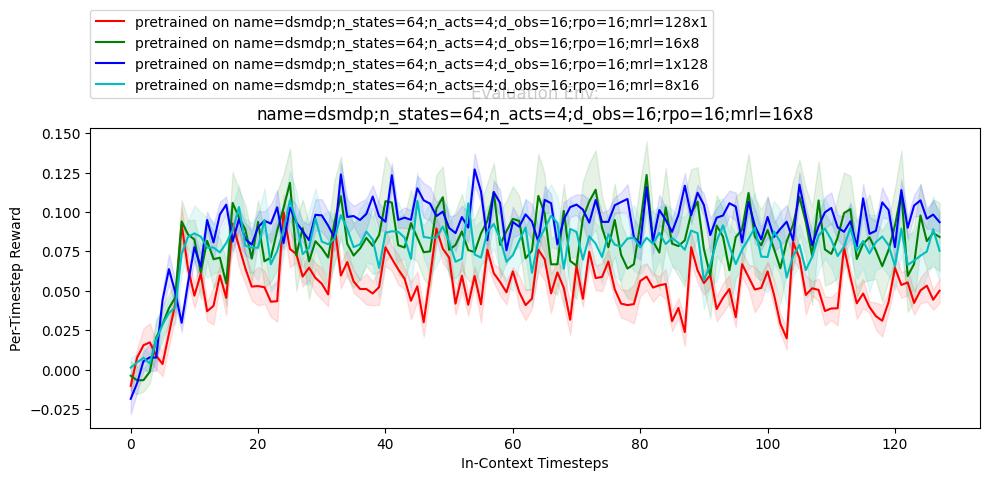

../data/eval/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=128x1


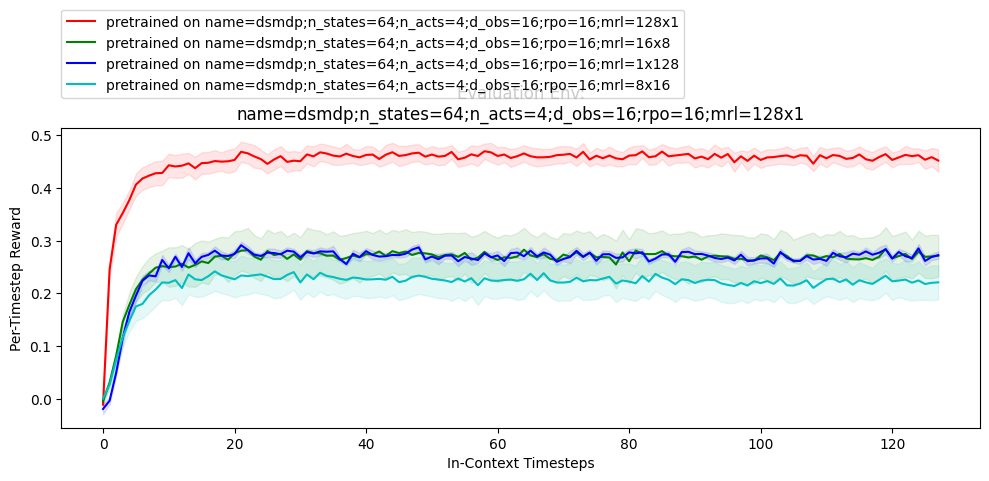

In [28]:

def viz_eval(load_dir):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    print(load_dir)
    eval_dirs = sorted([path for path in glob.glob(f"{load_dir}/*") if os.path.isdir(path)])
    assert len(eval_dirs) > 0
    plt.figure(figsize=(10, 5))
    for i, eval_dir in enumerate(eval_dirs):
        with open(f"{eval_dir}/config.json", "r") as f:
            config = json.load(f)
        with open(f"{config['load_dir']}/config.json", "r") as f:
            config_pre = json.load(f)
        env, env_pre = config['env_id'], config_pre['env_id']

        # with open(f"{eval_dir}/buffers.pkl", "rb") as f:
        #     buffers = jax.tree_map(lambda x: np.asarray(x), pickle.load(f))
        # print(jax.tree_map(lambda x: x.shape, buffers[0]))
        # env_state = buffers[0]['info']['base_env_state']
        # print(jax.tree_map(lambda x: x.shape, env_state))
        # from mdps.natural_mdps import CartPole, MountainCar, Acrobot
        # e = Acrobot()
        # env_params = e.default_params
        # from gymnax.visualize import Visualizer
        # state_seq = [jax.tree_map(lambda x: x[0, t, 0], env_state) for t in range(128)]
        # cum_rewards = [0 for _ in state_seq]
        # vis = Visualizer(e, env_params, state_seq, cum_rewards)
        # vis.animate(f"{config['save_dir']}/anim.gif")
        
        
        # plt.figure()
        with open(f'{eval_dir}/rew.pkl', 'rb') as f:
            rew = np.asarray(pickle.load(f)) # (s, n, t, e)
        rew = rew.mean(axis=(1, 3))
        plot_curve_err(np.arange(rew.shape[-1]), rew, c=matplotlib.colors.to_rgba(colors[i]), label=f"pretrained on {env_pre}")
        
        # for i, env_pre in enumerate(sorted(os.listdir(f'../data/transfer/{env_trans}'))):
        #     with open(f'../data/transfer/{env_trans}/{env_pre}/rews_trained.pkl', 'rb') as f:
        #         rews_trained = np.asarray(pickle.load(f))
        #     plot_single(rews_trained, label=f"pretrained on {env_pre}", c=matplotlib.colors.to_rgba(colors[i]))
        # with open(f'../data/transfer/{env_trans}/{env_pre}/rews_init.pkl', 'rb') as f:
        #     rews_init = np.asarray(pickle.load(f))
        # plot_single(rews_init, label='init', c=matplotlib.colors.to_rgba('black'))
    plt.title(f'Evaluation Env:\n{env}')
    plt.ylabel('Per-Timestep Reward')
    plt.xlabel('In-Context Timesteps')
    plt.legend(loc=(0., 1.1))
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'{args.save_dir}/plot_eval.png')

viz_eval("../data/eval/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=1x128")
viz_eval("../data/eval/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=8x16")
viz_eval("../data/eval/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=16x8")
viz_eval("../data/eval/name=dsmdp;n_states=64;n_acts=4;d_obs=16;rpo=16;mrl=128x1")



In [47]:

def viz_eval(load_dir):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    print(load_dir)
    eval_dirs = sorted([path for path in glob.glob(f"{load_dir}/*") if os.path.isdir(path)])
    assert len(eval_dirs) > 0
    plt.figure(figsize=(10, 5))
    for i, eval_dir in enumerate(eval_dirs):
        with open(f"{eval_dir}/config.json", "r") as f:
            config = json.load(f)
        env = config['env_id']
        if config['load_dir'] is not None:
            with open(f"{config['load_dir']}/config.json", "r") as f:
                config_pre = json.load(f)
            env_pre = config_pre['env_id']
        else:
            env_pre = "None"

        with open(f'{eval_dir}/rew.pkl', 'rb') as f:
            rew = np.asarray(pickle.load(f)) # (s, n, t, e)
        rew = rew.mean(axis=(1, 3))
        plot_curve_err(np.arange(rew.shape[-1]), rew, c=matplotlib.colors.to_rgba(colors[i]), label=f"pretrained on {env_pre}")
        
        # for i, env_pre in enumerate(sorted(os.listdir(f'../data/transfer/{env_trans}'))):
        #     with open(f'../data/transfer/{env_trans}/{env_pre}/rews_trained.pkl', 'rb') as f:
        #         rews_trained = np.asarray(pickle.load(f))
        #     plot_single(rews_trained, label=f"pretrained on {env_pre}", c=matplotlib.colors.to_rgba(colors[i]))
        # with open(f'../data/transfer/{env_trans}/{env_pre}/rews_init.pkl', 'rb') as f:
        #     rews_init = np.asarray(pickle.load(f))
        # plot_single(rews_init, label='init', c=matplotlib.colors.to_rgba('black'))
    plt.title(f'Evaluation Env:\n{env}')
    plt.ylabel('Per-Timestep Reward')
    plt.xlabel('In-Context Timesteps')
    plt.legend(loc=(0., 1.1))
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'{args.save_dir}/plot_eval.png')


../data/train/name=dsmdp;n_states=64;n_acts=5;d_obs=16;rpo=16;mrl=4x32


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


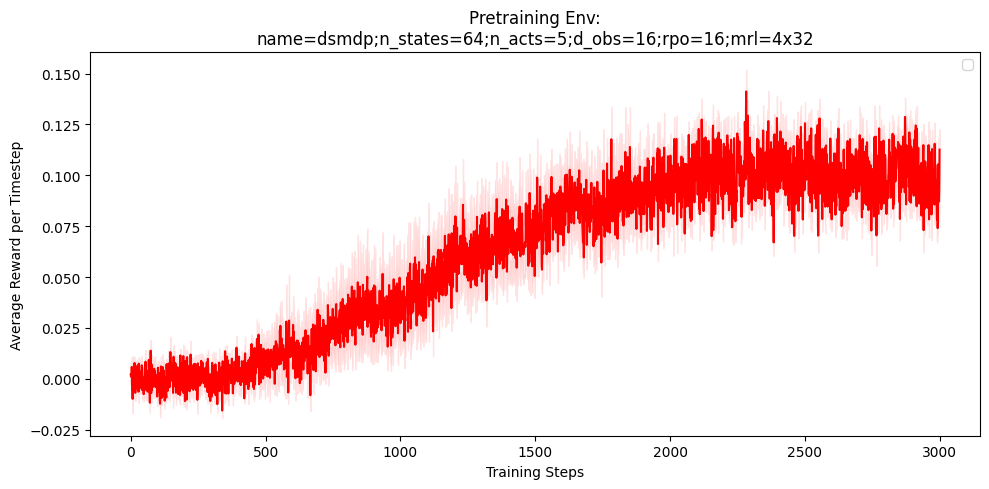

In [56]:
viz_training("../data/train/name=dsmdp;n_states=64;n_acts=5;d_obs=16;rpo=16;mrl=4x32")

../data/eval/name=cartpole;fobs=T;rpo=16;mrl=4x32


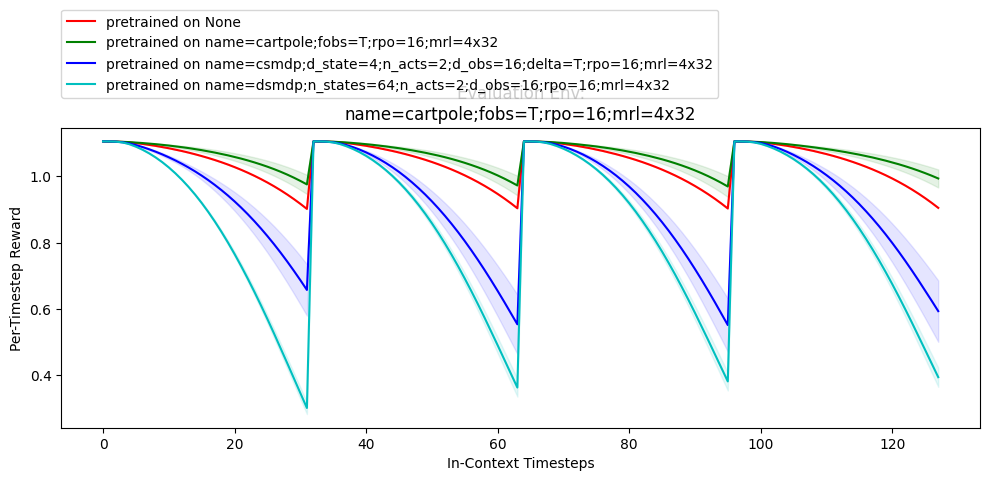

../data/eval/name=mountaincar;fobs=T;rpo=16;mrl=4x32


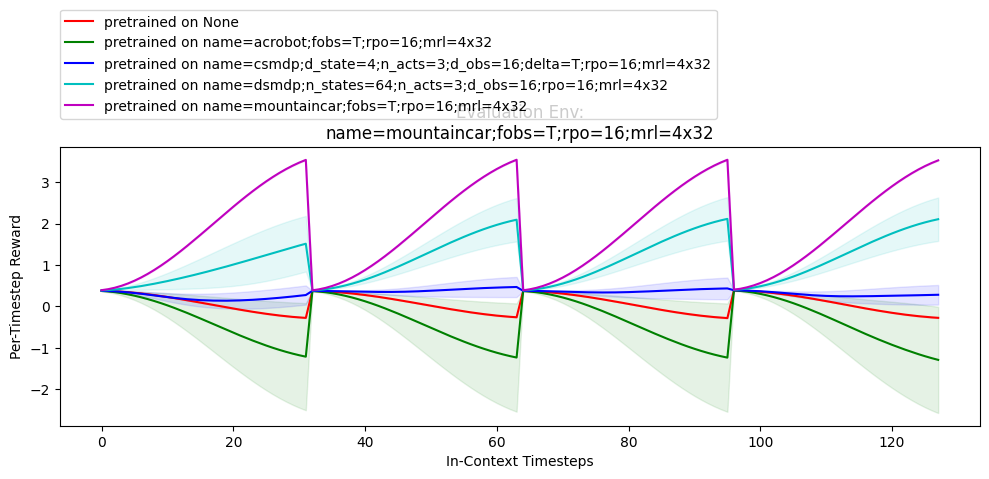

../data/eval/name=acrobot;fobs=T;rpo=16;mrl=4x32


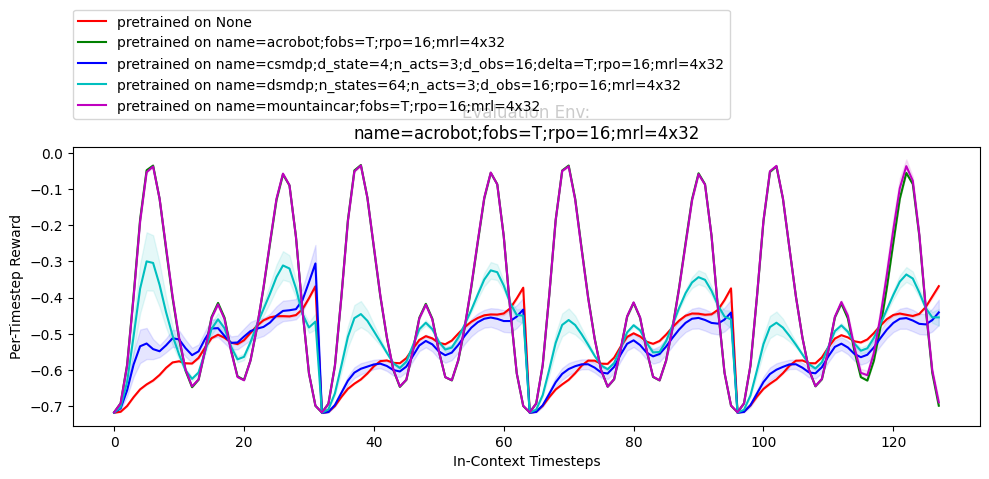

In [54]:
viz_eval("../data/eval/name=cartpole;fobs=T;rpo=16;mrl=4x32")
viz_eval("../data/eval/name=mountaincar;fobs=T;rpo=16;mrl=4x32")
viz_eval("../data/eval/name=acrobot;fobs=T;rpo=16;mrl=4x32")

../data/eval/name=gridenv;grid_len=8;pos_start=random;pos_rew=random;fobs=T;rpo=16;mrl=4x32


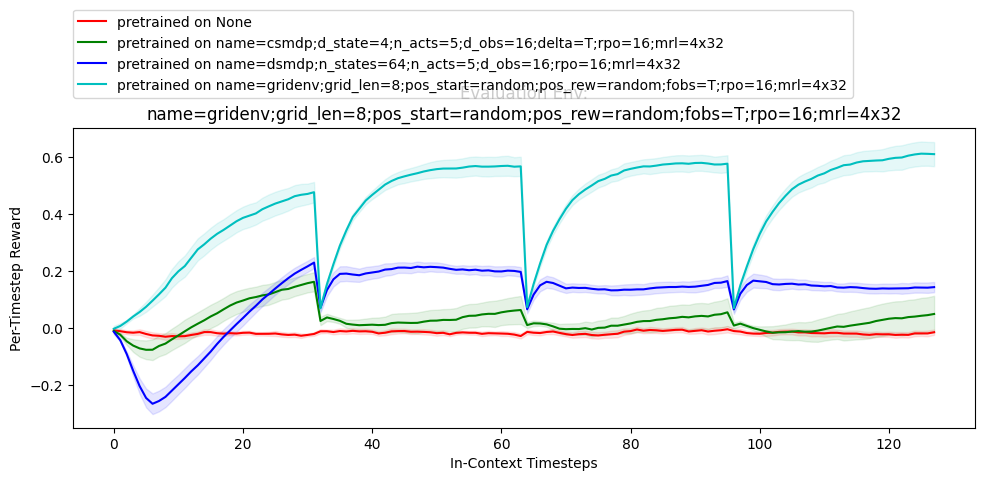

In [57]:
viz_eval("../data/eval/name=gridenv;grid_len=8;pos_start=random;pos_rew=random;fobs=T;rpo=16;mrl=4x32")

In [10]:
!ls "../data/transfer/name=gridenv;grid_len=8;fobs=T;rpo=64;tl=128/name=gridenv;grid_len=8;fobs=T;rpo=64;tl=128"

buffers.pkl  config.json  rew.pkl


In [96]:
with open("../data/transfer/name=gridenv;grid_len=8;pos_start=random;pos_rew=random;fobs=T;tl=128/name=gridenv;grid_len=8;pos_start=random;pos_rew=random;fobs=T;tl=128/buffers.pkl", "rb") as f:
    buffers = jax.tree_map(lambda x: jnp.asarray(x), pickle.load(f))

In [97]:
buffers[0].keys()

dict_keys(['act', 'done', 'env_state', 'info', 'log_prob', 'logits', 'obs', 'rew', 'val'])

In [90]:
d = np.stack([b['info']['goal_dist'] for b in buffers], axis=1)
d.shape

(8, 10, 128, 128)

(0.0, 9.0)

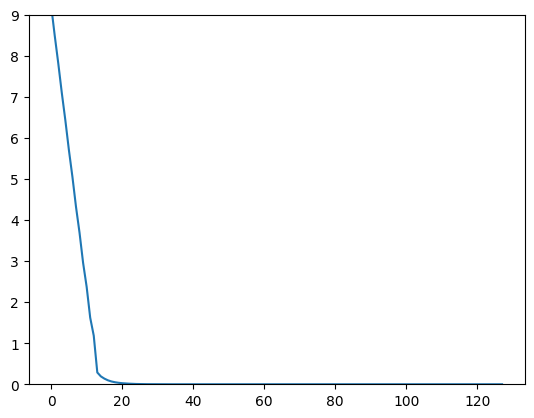

In [93]:
plt.plot(d.mean(axis=(0, 1, 3)))
plt.ylim(0, 9)